In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Supervised-Learning/main/titanic-training-data.csv")

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### analyse the data

<AxesSubplot:xlabel='Survived', ylabel='count'>

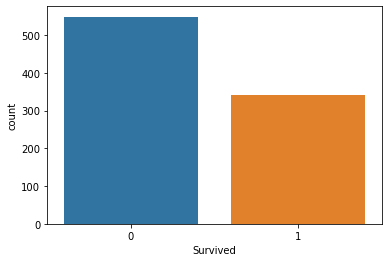

In [7]:
sns.countplot(x="Survived",data=df)

In [8]:
### 342 people suvived and 500 people were dead

In [9]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

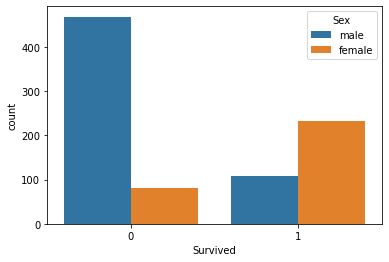

In [10]:
sns.countplot(x="Survived",hue="Sex",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

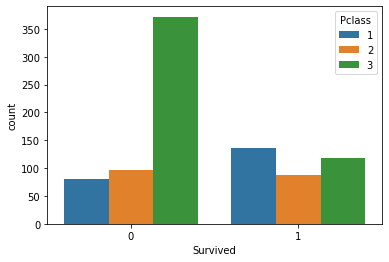

In [11]:
sns.countplot(x="Survived",hue="Pclass",data=df)

In [12]:
df[['Sex', 'Survived']].groupby(['Sex']).sum().sort_values(by='Survived')

,Survived
Sex,
male,109
female,233


<AxesSubplot:xlabel='SibSp', ylabel='count'>

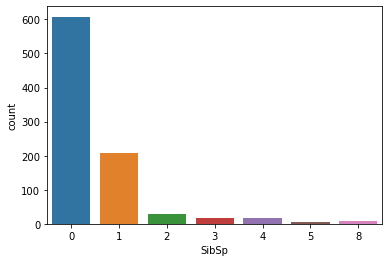

In [13]:
sns.countplot(x="SibSp",data=df)

In [14]:
### data wrangling

<AxesSubplot:>

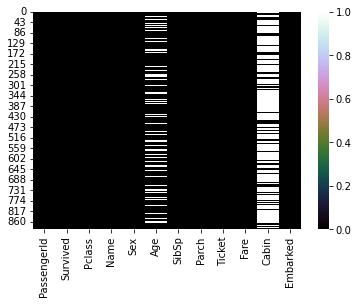

In [15]:
sns.heatmap(df.isnull(), cmap='cubehelix')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

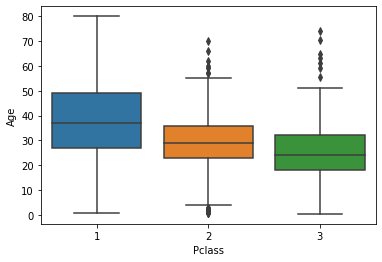

In [16]:
sns.boxplot(x='Pclass',y='Age',data=df)

<AxesSubplot:>

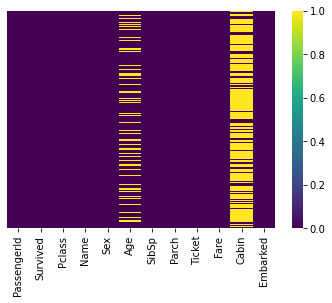

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

### Dropping missing values using dropna()

In [18]:
df.shape


(891, 12)

In [19]:
df.dropna().shape

(183, 12)

In [20]:
df.dropna(how="all").shape

(891, 12)

In [21]:
df.dropna(subset=["Cabin","Embarked"]).shape

(202, 12)

In [22]:
df.dropna(axis=1).shape

(891, 9)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
df.drop(['PassengerId','Name','Ticket','Fare','Cabin','Age'],axis=1,inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    object
 3   SibSp     891 non-null    int64 
 4   Parch     891 non-null    int64 
 5   Embarked  889 non-null    object
dtypes: int64(4), object(2)
memory usage: 41.9+ KB


In [26]:
dummies=pd.get_dummies(df[['Pclass','Sex','Embarked']])
df=pd.concat([df,dummies],axis=1)

In [27]:
columns=['Pclass','Sex','Embarked']
df.drop(columns,axis=1,inplace=True)

In [28]:
df.head(10)

,Survived,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1,0,0,1
1,1,1,0,1,0,1,0,0
2,1,0,0,1,0,0,0,1
3,1,1,0,1,0,0,0,1
4,0,0,0,0,1,0,0,1
5,0,0,0,0,1,0,1,0
6,0,0,0,0,1,0,0,1
7,0,3,1,0,1,0,0,1
8,1,0,2,1,0,0,0,1
9,1,1,0,1,0,1,0,0


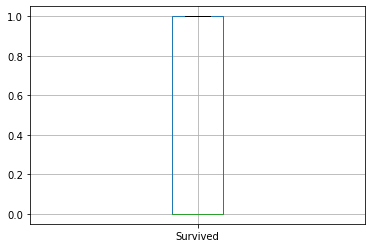

In [29]:
df.boxplot(column=["Survived"])
plt.show()

In [30]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [31]:
lowlotfrontage,upplotfrontage=remove_outlier(df['Survived'])
df["Survived"]=np.where(df['Survived']>upplotfrontage,upplotfrontage,df['Survived'])
df["Survived"]=np.where(df['Survived']<lowlotfrontage,lowlotfrontage,df['Survived'])